# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)" data-toc-modified-id="19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)</a></div><div class="lev1 toc-item"><a href="#Создание-пайплайна-и-генерация-признаков" data-toc-modified-id="Создание-пайплайна-и-генерация-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание пайплайна и генерация признаков</a></div><div class="lev2 toc-item"><a href="#Посмотрим-на-данные" data-toc-modified-id="Посмотрим-на-данные-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим на данные</a></div><div class="lev2 toc-item"><a href="#Генерим-признаки" data-toc-modified-id="Генерим-признаки-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Генерим признаки</a></div><div class="lev2 toc-item"><a href="#Подбор-гипер-параметров" data-toc-modified-id="Подбор-гипер-параметров-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подбор гипер-параметров</a></div><div class="lev3 toc-item"><a href="#Pipeline" data-toc-modified-id="Pipeline-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Pipeline</a></div><div class="lev3 toc-item"><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Подбор гиперпараметров</a></div><div class="lev4 toc-item"><a href="#Grid-search" data-toc-modified-id="Grid-search-2321"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Grid search</a></div><div class="lev4 toc-item"><a href="#Random-Search" data-toc-modified-id="Random-Search-2322"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Random Search</a></div><div class="lev3 toc-item"><a href="#HyperOpt" data-toc-modified-id="HyperOpt-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>HyperOpt</a></div><div class="lev2 toc-item"><a href="#Ваш-черед" data-toc-modified-id="Ваш-черед-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ваш черед</a></div><div class="lev3 toc-item"><a href="#Новые-признаки" data-toc-modified-id="Новые-признаки-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Новые признаки</a></div><div class="lev2 toc-item"><a href="#Поиск-гиперпараметров" data-toc-modified-id="Поиск-гиперпараметров-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск гиперпараметров</a></div>

# Skillfactory - Практический Machine Learning
## 19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)

<center> Шестаков Андрей </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Создание пайплайна и генерация признаков
<center>Шестаков Андрей</center>

В этом задании мы рассмотрим данные с предыдущего Sberbank Data Science Contest. К сожалению найти страницу с конкурсом уже не получается.

Одной из задач была опредление пола владельца карты по его транзакциям на карте. Зачем это нужно - одному сберу известно, но эта задача была хороша тем, что в ней можно нагенерировать много разных признаков

Есть такая [презентация](https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf) с предварительным анализом данных и идеями про признаки

Нам понадобятся файлы `customers_gender_train.csv`, `transactions.tsv.gz`, `mcc_types.tsv` и `trans_types.tsv`.

## Посмотрим на данные

Это метки ответов

In [2]:
df_gender = pd.read_csv('data/customers_gender_train.csv')
df_gender.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


In [3]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
customer_id    12000 non-null int64
gender         12000 non-null int64
dtypes: int64(2)
memory usage: 187.6 KB


Это сами транзакции (отрицательные транзакции - списывание, положительные - зачисление на счет)

In [4]:
df_transactions = pd.read_csv('data/transactions.csv.gz')
df_transactions.shape

(6849346, 6)

Далее, расшифровки кодов [mcc](https://ru.wikipedia.org/wiki/Merchant_Category_Code) и транзакций

In [5]:
df_tr = pd.read_csv('data/tr_types.csv', sep=';')
df_tr.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [6]:
df_mcc = pd.read_csv('data/tr_mcc_codes.csv', sep=';')
df_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


Первое что мы видем - это странная дата и суммы в транзакциях. 

В принципе, посмотрев на исходное распределение "относительных" дат по какой-нибудь гендерной группы mcc, становится примерно понятно, что за даты закодированы.

Ну а суммы транзакций организаторы просто умножили на $\pi^{\exp}$ =)

Преобразование будет проделано ниже, но при желании, можете сами со всем разобраться.

In [7]:
from pandas import Timestamp, DateOffset

In [8]:
def preproc_transactions(df_transactions):
    sec_per_day = 86400
    sec_per_hour = 3600
    
    start_date = 1420070400 - 154 * sec_per_day - 3 * sec_per_hour
    
    df_transactions.loc[:, 'day'] = df_transactions.tr_datetime\
                                               .str.split(' ')\
                                               .str.get(0)\
                                               .astype(int)
    df_transactions.loc[:, 'time_raw'] = df_transactions.tr_datetime\
                                                    .str.split(' ')\
                                                    .str.get(1)

    # set temp dt
    df_transactions.loc[:, 'dt_temp'] = pd.to_datetime(df_transactions.loc[:, 'time_raw'], 
                                                    format='%H:%M:%S')\
                                        + DateOffset(years=115)
    
    df_transactions = df_transactions.assign(dt = lambda x: x.dt_temp.astype(np.int64) // 10**9
                                             + (x.day - 153) * sec_per_day)\
                                     .assign(weekday = lambda x: ((x.day + 4) % 7 + 1))
        
    df_transactions.loc[:, 'datetime'] = pd.to_datetime(df_transactions.dt, unit='s')
    df_transactions.loc[:, 'date'] = df_transactions.loc[:, 'datetime'].dt.strftime('%Y-%m-%d')
    df_transactions.loc[:, 'hour'] = df_transactions.loc[:, 'datetime'].dt.strftime('%H')
    
    df_transactions.drop(['dt_temp', 'time_raw', 'tr_datetime'], axis=1, inplace=True)
    
    df_transactions.loc[:, 'amount'] = np.round(df_transactions.loc[:, 'amount']/(np.pi**np.exp(1)))
            
    return df_transactions

In [9]:
%%time
df_transactions = df_transactions.pipe(preproc_transactions)

CPU times: user 2min 54s, sys: 12.3 s, total: 3min 6s
Wall time: 3min 16s


In [10]:
df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15


#  Генерим признаки mcc_code и tr_type

В качестве базовых признаков 
* количество (доля) транзакций по каждому mcc_code
* количество (доля) транзакций по каждому tr_type
* количество (доля) транзакций в разные промежутки времени

In [12]:
df_gender = df_gender
df_transactions = df_transactions
if True:
    
    # кол-во транзакций каждого человека customer_id по типу mcc_code
    df_mcc_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0)

    # переименовать столбцы mcc_counts
    df_mcc_counts = df_mcc_counts.rename_axis(lambda x: 'mcc_{}_count'.format(x), axis=1)

    df_tr_type = \
        df_transactions.pivot_table(index=['customer_id'], columns='tr_type', values='amount', 
                             aggfunc=np.size, fill_value=0)

    # переименовать столбцы mcc_counts
    df_tr_type = df_tr_type.rename_axis(lambda x: 'tr_{}_count'.format(x), axis=1)
    
    
    # кол-во транзацкий mcc_code по колонке час
    df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)

/Users/dinar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  # Remove the CWD from sys.path while we load stuff.
/Users/dinar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  app.launch_new_instance()


In [17]:
print(df_mcc_counts.shape)
print(df_tr_type.shape)
print(df_hour_rations.shape)

(15000, 184)
(15000, 77)
(15000, 24)


In [20]:
total = df_hour_rations.sum(axis=1)
total.head()

customer_id
6815     226
22899    234
27914    111
28753    294
31385    365
dtype: int64

In [27]:
df_hour_rations.head()

hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,1,1,0,0,0,1,2,4,20,...,36,18,9,9,7,6,7,2,0,0
22899,2,6,6,3,2,1,1,0,1,20,...,16,18,19,7,13,12,11,4,5,0
27914,2,0,0,1,1,2,2,6,16,5,...,14,2,13,6,3,2,0,0,0,0
28753,67,1,9,7,15,21,22,21,18,10,...,8,3,1,2,0,0,0,1,0,0
31385,11,0,0,0,0,0,0,16,16,13,...,14,16,19,16,23,18,18,40,26,3


In [28]:
# Сложная и нетривиальная конструкция
total = df_hour_rations.sum(axis=1)
df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T
df_hour_rations.head()

hour,00,01,02,03,04,05,06,07,08,09,...,18,19,20,21,22,23,morning,day,evening,night
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,1,1,0,0,0,1,2,4,20,...,7,6,7,2,0,0,0.433628,0.460177,0.097345,0.008850
22899,2,6,6,3,2,1,1,0,1,20,...,13,12,11,4,5,0,0.354701,0.371795,0.192308,0.081197
27914,2,0,0,1,1,2,2,6,16,5,...,3,2,0,0,0,0,0.495495,0.423423,0.045045,0.036036
28753,67,1,9,7,15,21,22,21,18,10,...,0,0,0,1,0,0,0.547619,0.112245,0.003401,0.336735
31385,11,0,0,0,0,0,0,16,16,13,...,23,18,18,40,26,3,0.290411,0.328767,0.350685,0.030137


In [35]:
# Объединяем:
df_features2 = df_gender.join(df_mcc_counts, on='customer_id', how='left')\
                       .join(df_tr_type, on='customer_id', how='left')\
                       .join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')

df_features2.head().T.head()

,0,1,2,3,4
customer_id,75562265.0,10928546.0,69348468.0,84816985.0,61009479.0
gender,0.0,1.0,1.0,1.0,0.0
mcc_742_count,0.0,0.0,0.0,0.0,0.0
mcc_1711_count,0.0,0.0,0.0,0.0,0.0
mcc_1731_count,0.0,0.0,0.0,0.0,0.0


In [36]:
print(df_features2.shape)

(12000, 267)


# Посмотрим на данные через PCA

In [34]:
from IPython.display import display, Math

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

In [32]:
pca_coord = df_features2[list(df_features2.columns)[2:]].values
color = df_features2.gender.values

pca=PCA(n_components=2)
show_reduced = pca.fit_transform(pca_coord)

<IPython.core.display.Javascript object>


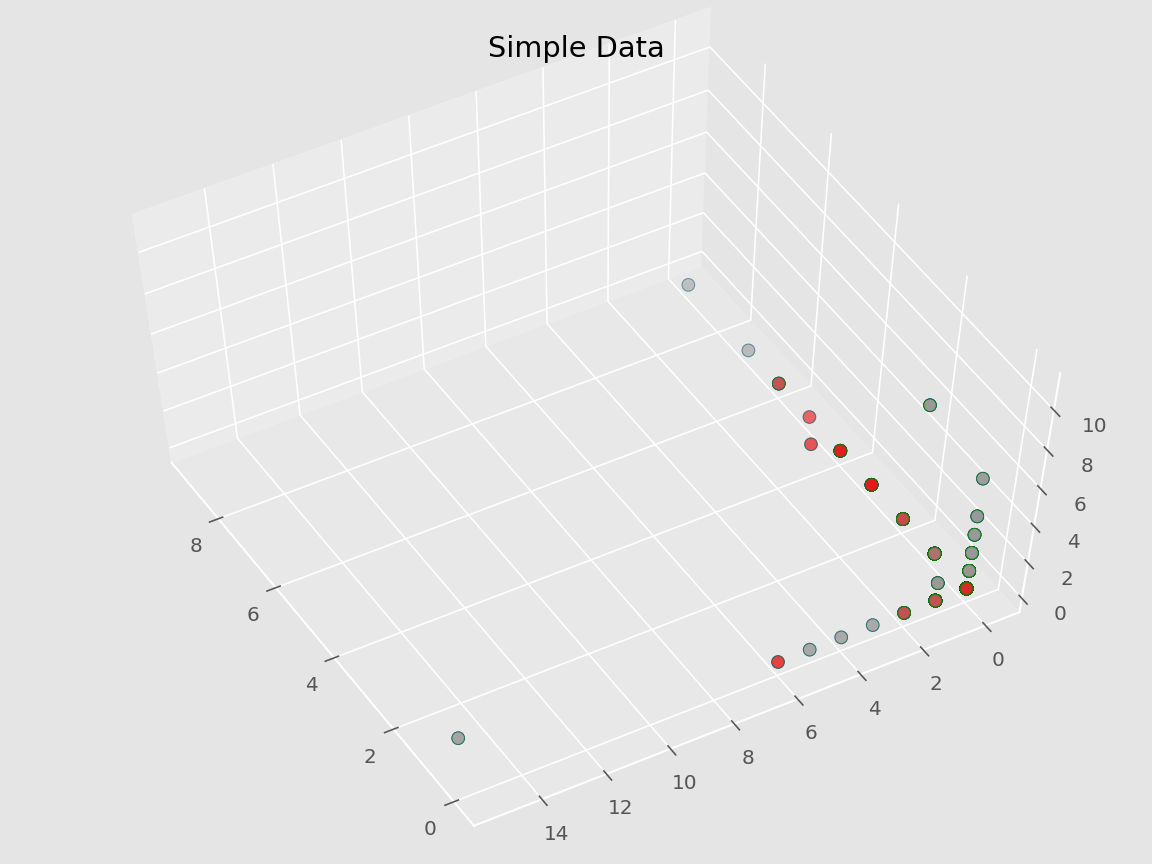

<IPython.core.display.Javascript object>


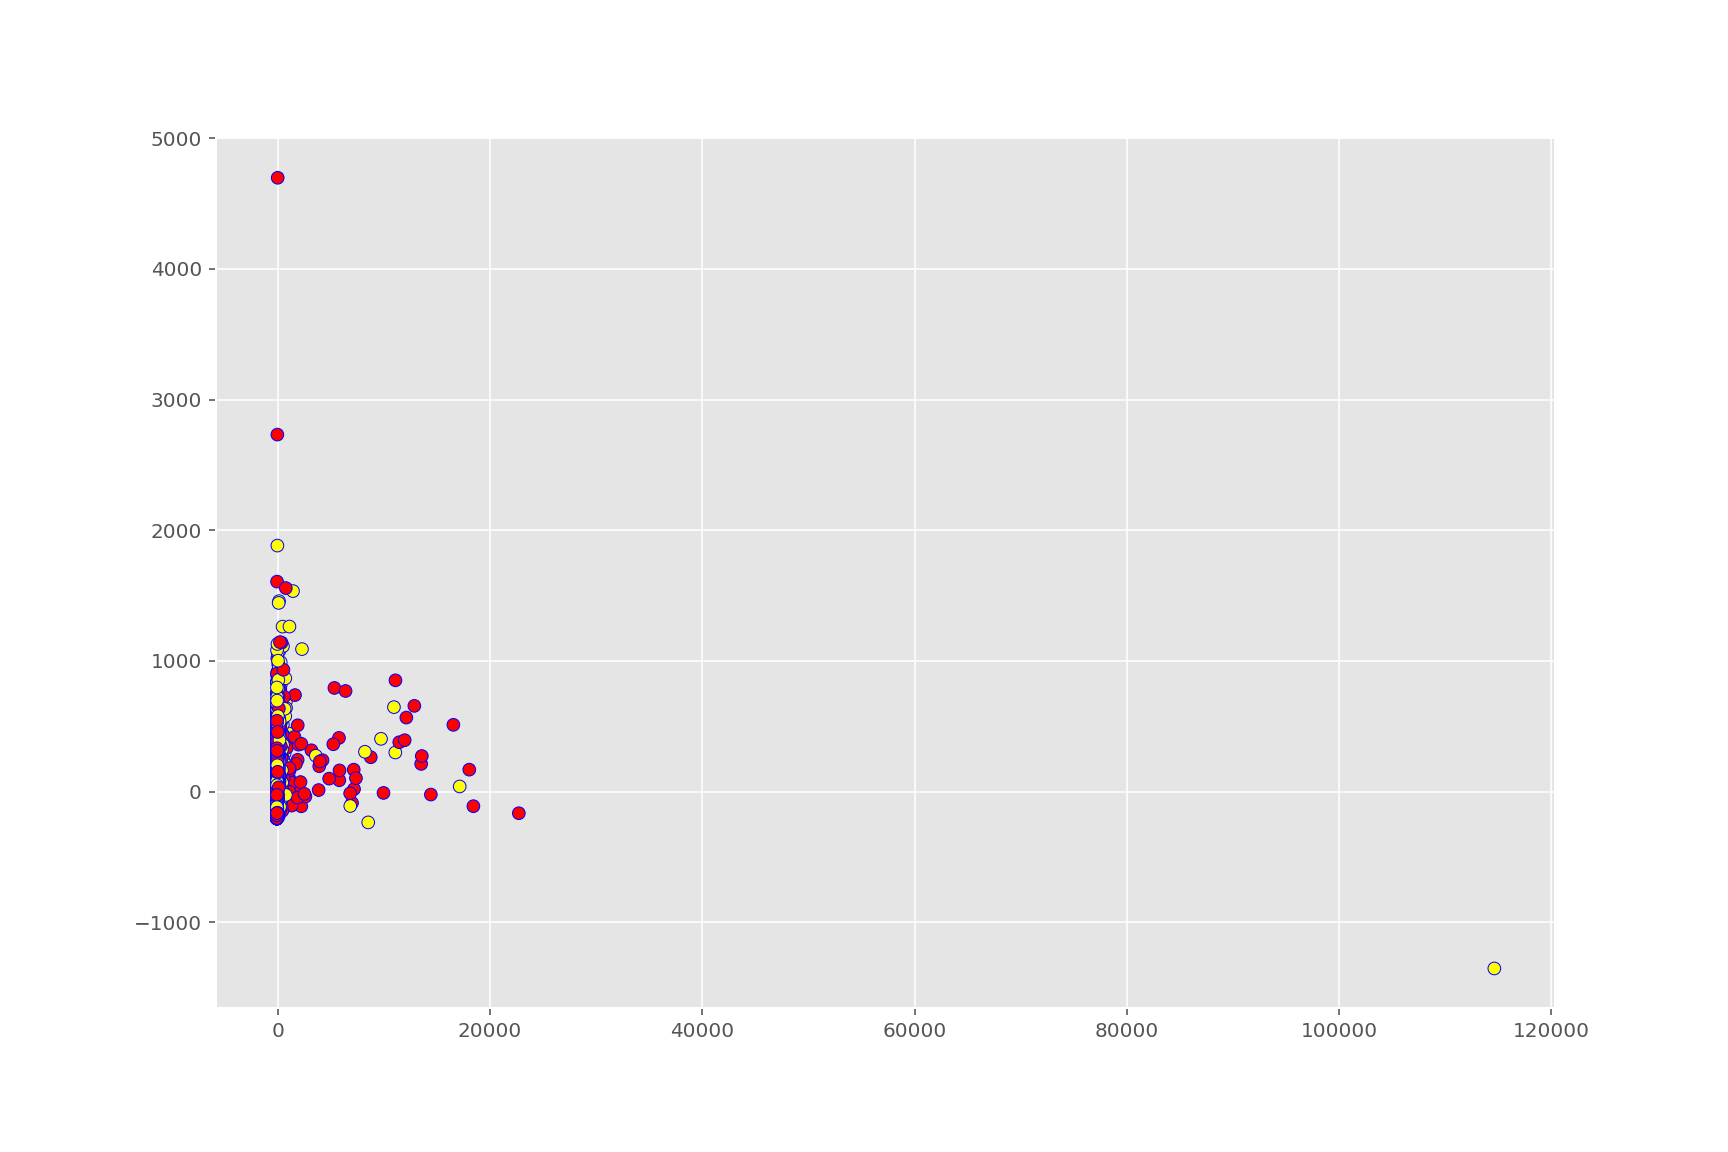

In [33]:
%matplotlib notebook
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

def plot_PCA(pca_coord):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=60, azim=150)
    ax.scatter(pca_coord[:, 0], pca_coord[:, 1], pca_coord[:, 2], 
               cmap=plt.cm.Set1, edgecolor='b', c=color ,s=40)
    ax.scatter(pca_coord[:, 0], pca_coord[:, 1], pca_coord[:, 2], 
               cmap=plt.cm.Set1, edgecolor='g', c=color ,s=40)
    ax.set_title("Simple Data")

    plt.show()

    pca=PCA(n_components=3)
    show_reduced = pca.fit_transform(pca_coord)

    fig, ax = plt.subplots()
    ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
               cmap=plt.cm.autumn, edgecolor='b', c=color ,s=40)
    plt.show()
    
plot_PCA(pca_coord)

ИТОГО: Явную кластеризацию метод PCA не показал.

In [48]:
df_features2.head().T.head()

,0,1,2,3,4
customer_id,75562265.0,10928546.0,69348468.0,84816985.0,61009479.0
gender,0.0,1.0,1.0,1.0,0.0
mcc_742_count,0.0,0.0,0.0,0.0,0.0
mcc_1711_count,0.0,0.0,0.0,0.0,0.0
mcc_1731_count,0.0,0.0,0.0,0.0,0.0


# Преобразование DataFrame в np.array

In [57]:
label = 'gender'
idx_features = df_features2.columns != label
idx_features[0] = False # Убираем первый столбец customer_id из матрицы для обучения

In [67]:
X = df_features2.loc[:, idx_features].values
y = df_features2.loc[:, label].values.flatten()
print(X.shape)
print(y.shape)

(12000, 265)
(12000,)


## Подбор гипер-параметров

### Pipeline

Сделаем простой sklearn пайплайн, который делает следующее:
* Нормирует признаки через StandartScaler
* Запускает лог-регрессию

In [59]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

In [60]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [61]:
RND_SEED = 123

### Подбор гиперпараметров

До этого мы исключительно смотрели, как влияет на меру качества какой-то один параметр при фиксированных остальных. Пришло время перебирать все что можно!

В базовом варианте, это делается либо через `Grid Search`, либо через `Random Search`. Какие ключевые отличия?
* В `Grid Search` вы в явнов виде задаете возможные значения каждого гипер-параметра, который хотите варьировать. Соответственно, выполняется **полный** перебор всех возможных комбинаций
* В `Random Search` допукается указание распределения параметров, например "равномерно, на интервале от 0 до 100" или "нормальное распределение с таким-то цетром и такой-то дисперсией. Соответственно, так как это случайный перебор, то **вы** просто **задаете** количество случайных комбинаций, которые будут проверяться

Может показаться, что делать случайный перебор опасно - там же все случайно. Но на практике именно он и искользуется в силу двух причин
* Полный перебор большого количества комбинаций очень долгий
* Мы можем просто пропустить значения гиперпараметра, которые сильно влияют на метрику качества (см рисунок снизу)

#### Grid search

In [62]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


In [63]:
# Задаем значения параметров, которые хотим проверить

# в данном случае "__" разленяет название гиперпараметра от этапа, где этот гиперпараметр используется
# если у нас будет не пайплайн, а просто один классификатор, то разделитель указывать не нужно
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': np.logspace(-5, 3, 10)
}

print(param_grid)

# Задаем схему кросс-валидации
cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03])}


In [69]:
grid_searcher = GridSearchCV(model, param_grid, 
                             scoring='roc_auc', 
                             n_jobs=-1, cv=cv, 
                             verbose=2)

grid_searcher.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/Users/dinar/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/dinar/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/dinar/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000e-05, 7.74264e-05, 5.99484e-04, 4.64159e-03, 3.59381e-02,
       2.78256e-01, 2.15443e+00, 1.66810e+01, 1.29155e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

На выходе в grid_searcher можно посмотреть, какая комбинация оказалась наилучшей, сколько занял рачет и напрямую достать лучшую модель.

In [70]:
grid_searcher.best_params_

{'clf__C': 0.03593813663804626,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': False}

In [71]:
grid_searcher.best_score_

0.8359436437256181

In [72]:
results = pd.DataFrame(grid_searcher.cv_results_)

/Users/dinar/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dinar/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dinar/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dinar/anaconda3/lib/pyth

In [73]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.658692,0.068617,0.029331,0.017535,1e-05,l1,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",0.500000,...,0.500000,0.000000,36,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
1,0.942006,0.194084,0.017707,0.005529,1e-05,l1,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",0.500000,...,0.500000,0.000000,36,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
2,0.532539,0.010629,0.014715,0.003833,1e-05,l2,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",0.796943,...,0.799944,0.005059,33,0.805868,0.809987,0.809144,0.804528,0.809862,0.807878,0.002247
3,0.712594,0.053940,0.013753,0.001674,1e-05,l2,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",0.777654,...,0.784525,0.011775,34,0.787705,0.798806,0.798695,0.785634,0.792945,0.792757,0.005443
4,0.443131,0.057639,0.015030,0.003907,7.74264e-05,l1,123,False,"{'clf__C': 7.742636826811278e-05, 'clf__penalt...",0.500000,...,0.500000,0.000000,36,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000


In [74]:
best_model = grid_searcher.best_estimator_

#### Random Search

In [75]:
from scipy.stats import randint as sp_randint
from scipy.stats import lognorm as sp_lognorm

In [76]:
sp_lognorm(4).rvs()

4.44284722241782

In [77]:
# Задаем значения параметров, которые хотим проверить
# Теперь с распределениями
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': sp_lognorm(4)
}

print(param_grid)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1db9fd9b0>}


In [78]:
%%time
# Рассмотрим 20 случайных комбинаций
random_searcher = RandomizedSearchCV(model, param_grid, n_iter=20, 
                                     random_state=RND_SEED,
                                     scoring='roc_auc', 
                                     n_jobs=-1, cv=cv, 
                                     verbose=2)

random_searcher.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/Users/dinar/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/dinar/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/dinar/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Paral

CPU times: user 942 ms, sys: 471 ms, total: 1.41 s
Wall time: 5min 13s


Аналогичный выхлоп

In [79]:
random_searcher.best_params_

{'clf__C': 0.023675003937163,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': False}

In [80]:
random_searcher.best_score_

0.8358436571255063

In [81]:
results = pd.DataFrame(random_searcher.cv_results_)

/Users/dinar/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dinar/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dinar/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/dinar/anaconda3/lib/pyth

In [82]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.704253,0.116562,0.024938,0.013377,0.0130037,l1,123,False,"{'clf__C': 0.013003686130638284, 'clf__penalty...",0.830489,...,0.832331,0.004272,5,0.838517,0.838689,0.839729,0.839202,0.837510,0.838729,0.000742
1,50.460675,25.410227,0.017889,0.004081,54.0215,l1,123,True,"{'clf__C': 54.02148221946703, 'clf__penalty': ...",0.832325,...,0.829658,0.003555,13,0.855288,0.857269,0.856278,0.856096,0.855366,0.856059,0.000720
2,4.022291,0.555567,0.017898,0.004008,0.0988254,l1,123,True,"{'clf__C': 0.09882536189042468, 'clf__penalty'...",0.835687,...,0.834745,0.002946,3,0.853387,0.854958,0.854831,0.854625,0.853032,0.854167,0.000797
3,53.406842,33.213252,0.017908,0.005880,739.331,l1,123,True,"{'clf__C': 739.3313143249965, 'clf__penalty': ...",0.832305,...,0.829611,0.003543,17,0.855283,0.857280,0.856286,0.856106,0.855372,0.856065,0.000723
4,0.428640,0.011897,0.013874,0.003088,6.08732e-05,l1,123,False,"{'clf__C': 6.0873234832561394e-05, 'clf__penal...",0.500000,...,0.500000,0.000000,19,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000


In [83]:
best_model = random_searcher.best_estimator_

### HyperOpt

Есть еще другой вариант - "умный" перебор параметров. И вот тут нам помогает библиотека `hyperopt`.

Если невдаваться в детали, то `hyperopt` определяет следующего набора-кандидата с помощью некоторого алгоритма, который балансирует исследование еще не изведанных областей значений гиперпараметров и направления, вдоль которых наблюдались улучшения целеой метрики.

То есть мы задаем некоторую функцию, и ставим себе цель **минимизировать** (такова договоренность в `hyperopt`) ее значение исходя из параметров, которые она принимает.

Например, возьмем функцию $f(x) = \sin(x)/x$ и будем искать ее минимум при условии, что $x$ будет равномерно распределен на интервале $[-7.5, 7.5]$

In [ ]:
# sudo pip install networkx==1.11

In [84]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, rand

Нашли)

Возвращаясь к нашим баранам, функция вданном случае будет возвращать метрику качества модели (пайплайна) на кроссвалидации. С помощью `hyperopt` мы будем искать минимум этой функции при заданных диаполознах значений гипер параметров.

Но самым важным плюсом, как по мне, является гибкость - в функцию, которую мы хотим минимизировать можно написать все что угодно. Например, сейчас я добавлю вариативность в пайплайне по типу шкалирования между - StandartScaler или RobustScaler.

In [85]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [87]:
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('scaler', scaler),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials

In [88]:
# Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l1', 'l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}

In [89]:
%%time
# Запускаем поиск
trials = run_trials_template(X, y, space4_lm, evals=40)

CPU times: user 1.82 s, sys: 1.33 s, total: 3.15 s
Wall time: 3min 22s


In [90]:
def trials_df(trials):
    '''
    Функция форматирует результаты hyperopt в dataframe
    '''
    tr_dict = []
    for t in trials:
        trial = dict()
        for k, v in t['misc']['vals'].items():
            trial[k] = v[0]

        trial['qscore'] = -t['result']['qscore']
        trial['qscore_std'] = -t['result']['qscore_std']
        tr_dict.append(trial)

    df_res = pd.DataFrame.from_dict(tr_dict)
    df_res = df_res.sort_values('qscore', ascending=False)
    
    return df_res

Достаем результаты.

Стоит оговорится, что в некоторых столбцах указаны не фактические значение гиперпараметров, а их позиция в соответствуюем поле в `space4_lm`

In [91]:
df_trials = trials_df(trials)

Здесь `qscore` - метрика качесва, а `scaler_type = 1` означает, что был выбран `scaler_type = robust`

In [92]:
df_trials.head()

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
23,0.023628,0,0,0.838494,-0.003915,1,1
24,0.020864,0,0,0.838481,-0.004079,1,1
20,0.024753,0,0,0.838471,-0.003846,1,1
34,0.018790,0,0,0.838458,-0.004155,1,1
22,0.026232,0,0,0.838434,-0.003779,1,1


## Ваш черед

### Новые признаки

Задание творческое - придумайте по новому признаку (группе признаков)
* На основе mcc (tr_type)
* На основе временного фактора
* На основе текстов из описания mcc

Реалиуйте их в функции, аналогичной `gen_features`.

In [ ]:
df_transactions.pivot_table(index=['customer_id'],
                            columns='mcc_code',
                            values='amount', 
                            aggfunc=np.sum,
                            fill_value=0)

## Поиск гиперпараметров

Реализуйте функцию для hyperopt по перебору гипер параметров вашего пайплайна

На всякий случай почитайте еще про [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) и [пример](http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html#sphx-glr-auto-examples-hetero-feature-union-py)

In [ ]:
# А это трансформер, который выбирает подможнество столбцов из матрицы X
# Который нужен для того, чтобы делать какие-то действия только для подмноества столбцов, а потом объединять результаты
# Через FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, col_idx):
        self.col_idx = col_idx
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, self.col_idx]